<img align="right" width="250" height="150" src="https://lh3.googleusercontent.com/p/AF1QipPWZQfa087JiVjutpUTVEGRnh6W214Wjm439gKQ=w1080-h608-p-no-v0">

## **Proyecto:** Retención de usuarios de la Plataforma Digital

#### El objetivo de este notebook es realizar el análisis EDA del archivo de `..\Turnero_YYYYMM.csv` con el objeto de ver que datos incorporar en el archivo de `..\Crosseling_ampliado_YYYYMM.csv`.

In [2]:
import pandas as pd
import pandas_profiling
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import os

try:
    # Monto la unidad de drive porque los archivos son muy grandes
    from google.colab import drive
    drive.mount('/content/drive')
    DIR = '/content/drive/MyDrive/Trayecto3-DataDriven/Data/'
except:
    # Sino lo consigo asumo que estoy trabajando local
    DIR = os.path.abspath(r'..\Data\Export') + '\\'

In [3]:
uc = [
    'Proceso',
    'Tipo_atencion',
    'Fecha_creada',
    'Fecha_turno',
    'Estado',
    'Hora_desde',
    'Hora_hasta'
]

tc = dict(zip(uc, [str] * len(uc)))

In [4]:
file = DIR + 'Turnero.csv'
df = pd.read_csv(file, index_col=False, usecols=uc, dtype=tc, parse_dates=['Fecha_creada', 'Fecha_turno'])

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2368317 entries, 0 to 2368316
Data columns (total 7 columns):
 #   Column         Dtype         
---  ------         -----         
 0   Proceso        object        
 1   Tipo_atencion  object        
 2   Fecha_creada   datetime64[ns]
 3   Fecha_turno    datetime64[ns]
 4   Estado         object        
 5   Hora_desde     object        
 6   Hora_hasta     object        
dtypes: datetime64[ns](2), object(5)
memory usage: 126.5+ MB


In [6]:
# Analizamos
df.reset_index(drop=True, inplace=True)
report = pandas_profiling.ProfileReport(df)
report

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [7]:
# Indexamos por Fecha turno
df.set_index('Fecha_turno', inplace=True)


In [8]:
# Filtramos para este un mes a ver que pasa
df = df[(df.index >= datetime(2022, 1, 1)) & ((df.index < datetime(2022, 5, 1)))]
df

,Proceso,Tipo_atencion,Fecha_creada,Estado,Hora_desde,Hora_hasta
Fecha_turno,,,,,,
2022-02-01,Hablar con un asesor,PRESENCIAL,2022-01-02 12:59:47,VENCIDA,13:40,14:00
2022-02-03,Asesoramiento Comercial: Videollamada desde tu...,VIRTUAL,2022-02-02 17:40:34,FINALIZADA,16:00,16:30
2022-02-03,Asesoramiento Comercial: Videollamada desde tu...,VIRTUAL,2022-02-02 17:40:34,FINALIZADA,16:00,16:30
2022-03-02,Asesoramiento créditos hipotecarios Casa Banco...,VIRTUAL,2022-02-22 10:52:44,FINALIZADA,14:55,15:15
2022-03-25,Asesoramiento créditos hipotecarios Casa Banco...,VIRTUAL,2022-12-03 01:34:51,FINALIZADA,15:35,15:55
...,...,...,...,...,...,...
2022-03-01,Asesoramiento créditos hipotecarios Casa Banco...,VIRTUAL,2022-02-20 19:22:06,FINALIZADA,13:35,13:55
2022-03-09,Asesoramiento créditos hipotecarios Casa Banco...,VIRTUAL,2022-02-28 15:21:11,FINALIZADA,12:35,12:55
2022-04-05,Hablar con un asesor,PRESENCIAL,2022-04-04 15:45:33,VENCIDA,11:20,11:40


In [9]:
# Analizamos nuevamente
report = pandas_profiling.ProfileReport(df)
report

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [10]:
# Filtramos para los turnos concretados
df = df[df['Estado']=='FINALIZADA'].drop('Estado', axis=1)

In [11]:
df

,Proceso,Tipo_atencion,Fecha_creada,Hora_desde,Hora_hasta
Fecha_turno,,,,,
2022-02-03,Asesoramiento Comercial: Videollamada desde tu...,VIRTUAL,2022-02-02 17:40:34,16:00,16:30
2022-02-03,Asesoramiento Comercial: Videollamada desde tu...,VIRTUAL,2022-02-02 17:40:34,16:00,16:30
2022-03-02,Asesoramiento créditos hipotecarios Casa Banco...,VIRTUAL,2022-02-22 10:52:44,14:55,15:15
2022-03-25,Asesoramiento créditos hipotecarios Casa Banco...,VIRTUAL,2022-12-03 01:34:51,15:35,15:55
2022-03-02,Asesoramiento créditos hipotecarios Casa Banco...,VIRTUAL,2022-02-21 23:03:01,15:35,15:55
...,...,...,...,...,...
2022-03-23,Asesoramiento créditos hipotecarios Casa Banco...,VIRTUAL,2022-11-03 15:07:03,14:15,14:35
2022-02-02,Hablar con un asesor,PRESENCIAL,2022-02-02 02:02:40,12:40,13:00
2022-03-29,Caja,PRESENCIAL,2022-03-29 00:03:35,11:30,11:40


In [12]:
# Analizamos nuevamente
report = pandas_profiling.ProfileReport(df)
report

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

<AxesSubplot:xlabel='Fecha_turno', ylabel='Proceso'>

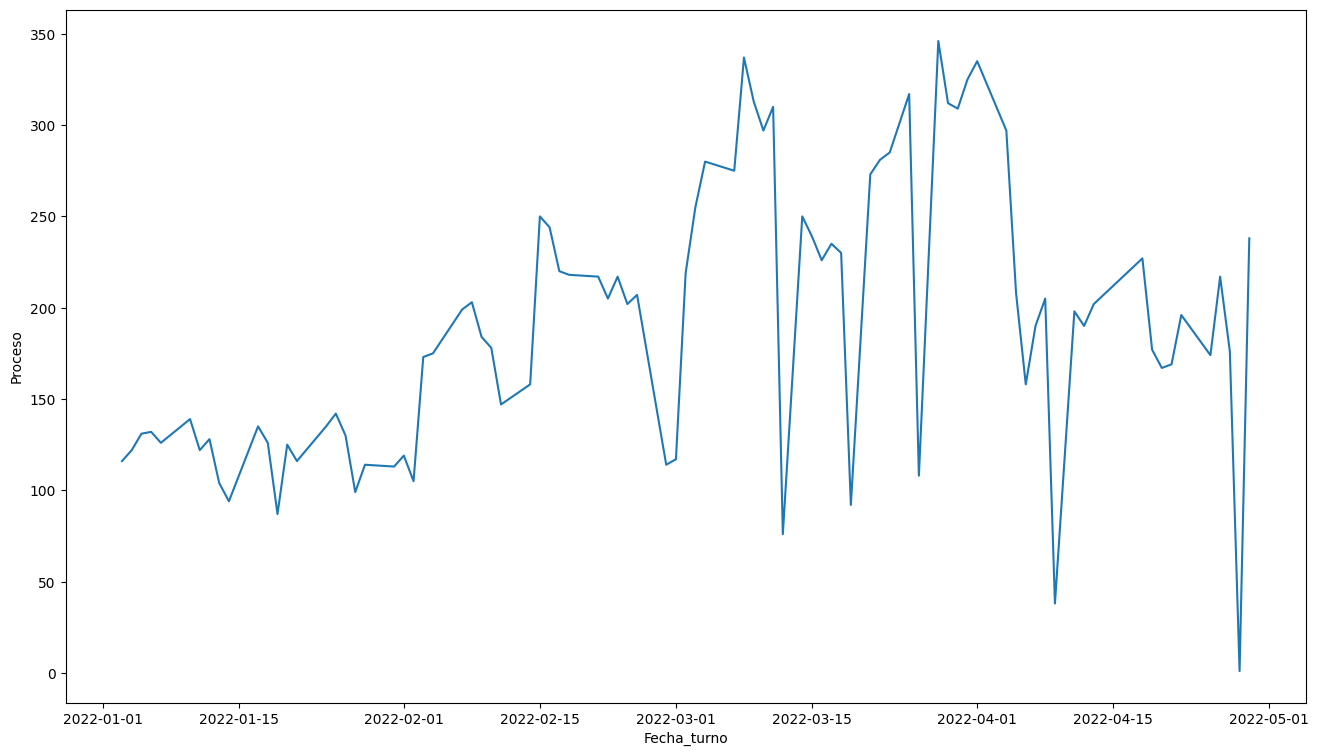

In [13]:
plt.figure(figsize=(16, 9))
sns.lineplot(data = df['Proceso'].groupby(['Fecha_turno']).aggregate('count'))

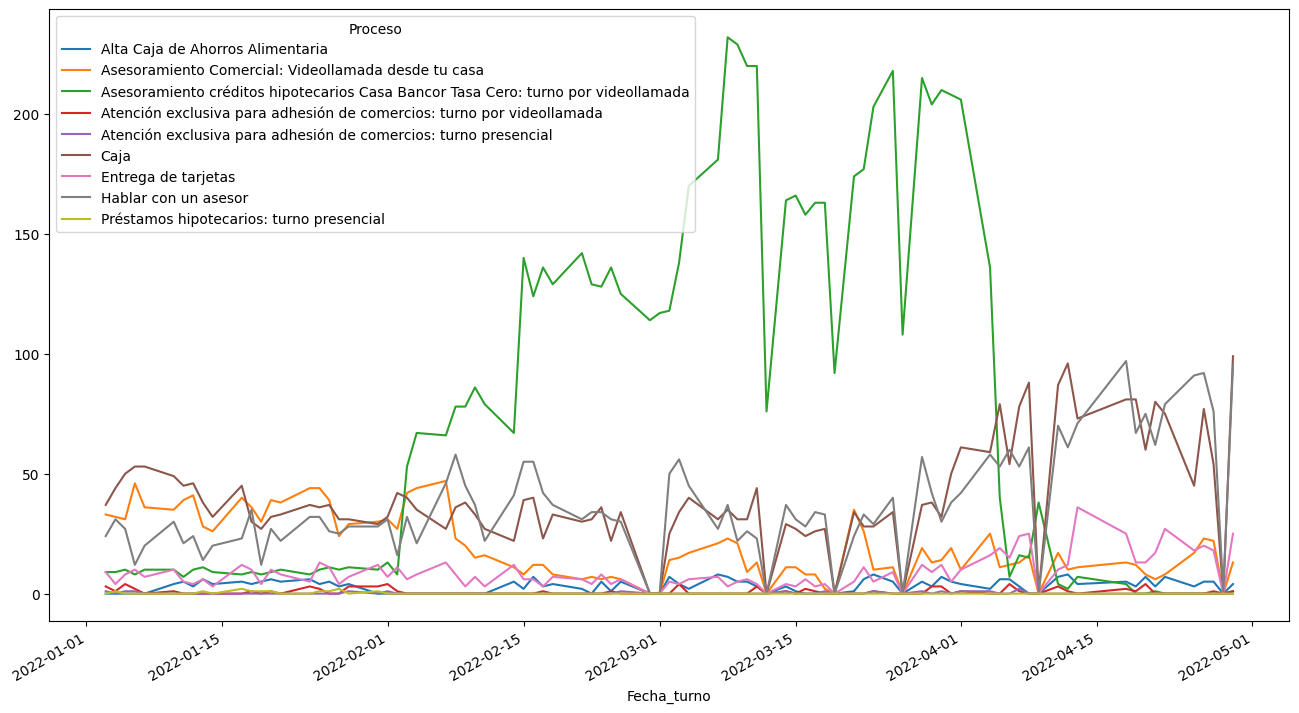

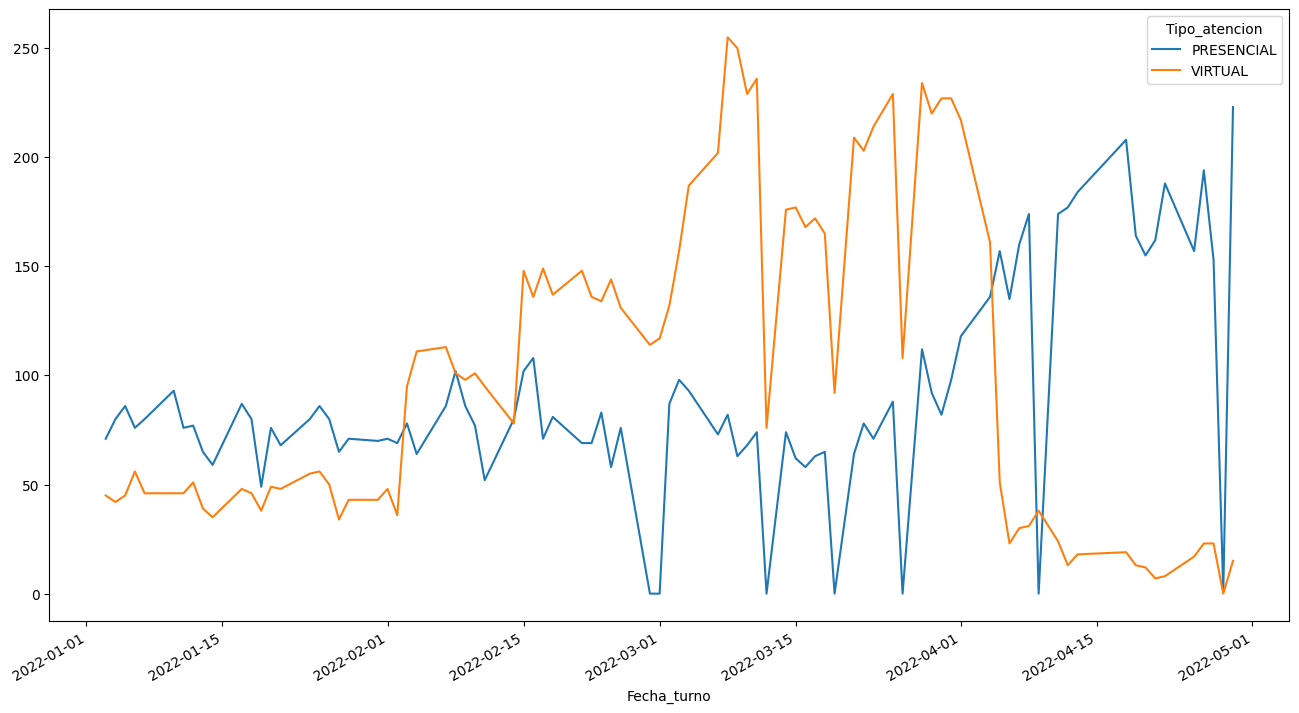

In [14]:
for caracteristica in ['Proceso', 'Tipo_atencion']:
    df_tn_cnt = df[[caracteristica]].pivot_table(index='Fecha_turno', columns=caracteristica, aggfunc=len, fill_value=0)
    df_tn_cnt.plot(figsize=(16, 9))